In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from fbprophet import Prophet
from datetime import datetime
%matplotlib inline 

In [3]:
successfulVends_raw = pd.read_csv("successfulVENDS2019.csv")
deposit_raw = pd.read_csv("deposit2019.csv")
loan_raw = pd.read_csv("loan2019.csv")

/home/sylvia/face/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
deposit = deposit_raw[["billrefnumber","systemtranstime","transamount"]]
successfulVends = successfulVends_raw[["address","time","amount"]]

In [5]:
deposit= deposit.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})

In [6]:
deposit['time']=pd.to_datetime(deposit.time)
successfulVends['time']=pd.to_datetime(successfulVends.time)

/home/sylvia/face/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [7]:
deposit['date']=deposit.time.dt.date

In [8]:
deposit_transactions_hour = deposit.groupby([deposit.time.dt.hour,deposit.date] ).count()['time'].rename(columns={'time':'count'}).reset_index()

In [9]:
pd.to_datetime(deposit_transactions_hour.date.head())

0   2019-01-07
1   2019-01-09
2   2019-01-10
3   2019-01-11
4   2019-01-13
Name: date, dtype: datetime64[ns]

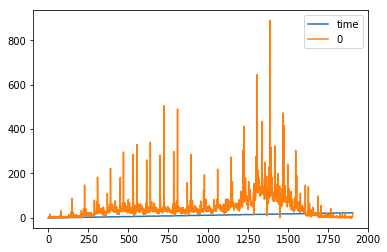

In [10]:
deposit_transactions_hour=pd.DataFrame(deposit_transactions_hour)
deposit_transactions_hour.plot()

In [27]:
deposit_transactions_hour.head()

,time,date,0
0,0,2019-01-07,1
1,0,2019-01-09,4
2,0,2019-01-10,1
3,0,2019-01-11,3
4,0,2019-01-13,2


In [11]:
deposit_transactions_hour['date']=pd.to_datetime(deposit_transactions_hour.date)

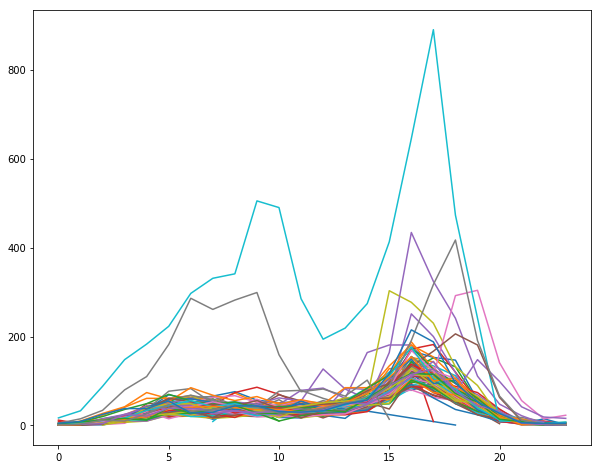

In [12]:

plt.figure(figsize=(10, 8))
for i in range(1,32):
    for j in range(1,4):
        temp = deposit_transactions_hour[deposit_transactions_hour.date.dt.day==i]
        
        plt.plot(temp[temp.date.dt.month==j].time,temp[temp.date.dt.month==j].iloc[:, 2])


In [13]:
deposit_transactions_by_hour = deposit.groupby(deposit.time.dt.hour ).count()['time'].rename(columns={'time':'count'})

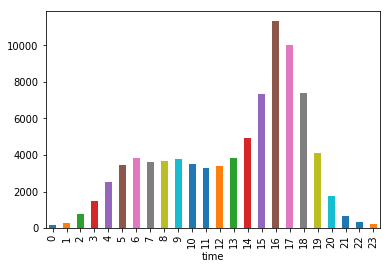

In [14]:
deposit_transactions_by_hour.plot.bar()

In [15]:
successfulVends= successfulVends.rename(index=str,columns={"transamount":"amount","systemtranstime":"time"})

In [16]:
successfulVends['date']=successfulVends.time.dt.date

In [17]:
successfulVends_transactions_hour = successfulVends.groupby([successfulVends.time.dt.hour,successfulVends.date] ).count()['time'].rename(columns={'time':'count'}).reset_index()

In [18]:
successfulVends_transactions_hour.head()

,time,date,0
0,0,2019-01-09,4
1,0,2019-01-11,3
2,0,2019-01-13,2
3,0,2019-01-15,1
4,0,2019-01-17,1


In [19]:
pd.to_datetime(successfulVends_transactions_hour.date.head())

0   2019-01-09
1   2019-01-11
2   2019-01-13
3   2019-01-15
4   2019-01-17
Name: date, dtype: datetime64[ns]

In [20]:
successfulVends_transactions_hour=pd.DataFrame(successfulVends_transactions_hour)
successfulVends_transactions_hour.head()

,time,date,0
0,0,2019-01-09,4
1,0,2019-01-11,3
2,0,2019-01-13,2
3,0,2019-01-15,1
4,0,2019-01-17,1


In [21]:
successfulVends_transactions_hour['date']=pd.to_datetime(successfulVends_transactions_hour.date)

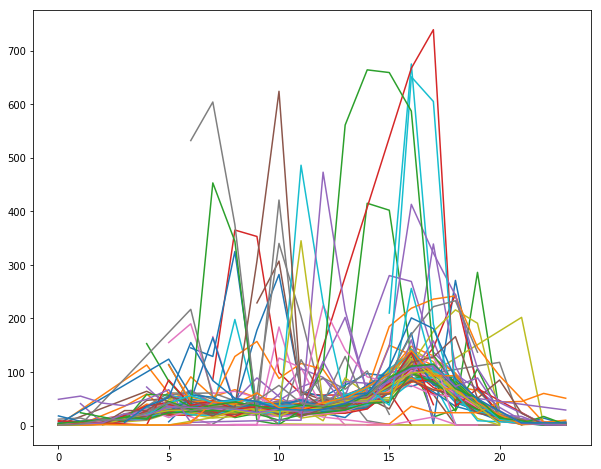

In [22]:

plt.figure(figsize=(10, 8))
for i in range(1,32):
    for j in range(1,4):
        temp = successfulVends_transactions_hour[successfulVends_transactions_hour.date.dt.day==i]
        
        plt.plot(temp[temp.date.dt.month==j].time,temp[temp.date.dt.month==j].iloc[:, 2])


In [23]:
successfulVends_transactions_by_hour = successfulVends.groupby(successfulVends.time.dt.hour ).count()['time'].rename(columns={'time':'count'})

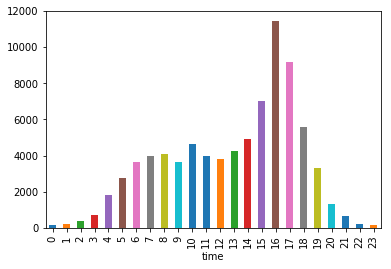

In [24]:
successfulVends_transactions_by_hour.plot.bar()


<BarContainer object of 24 artists>

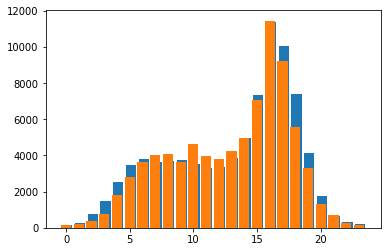

In [25]:
ax = plt.subplot(111)
bar_width = 0.1
ax.bar(deposit_transactions_by_hour.index+bar_width,deposit_transactions_by_hour.values)
ax.bar(successfulVends_transactions_by_hour.index,successfulVends_transactions_by_hour.values)


## Loan

In [26]:
Let

NameError: name 'Let' is not defined